In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape
y_train.shape

(50000, 1)

In [10]:
y_train = y_train.reshape(-1,)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 163s 103ms/step - loss: 1.8129 - accuracy: 0.3511
Epoch 2/5
1563/1563 [==============================] - 265s 170ms/step - loss: 1.6225 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 179s 115ms/step - loss: 1.5417 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.4820 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 229s 146ms/step - loss: 1.4320 - accuracy: 0.4983


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

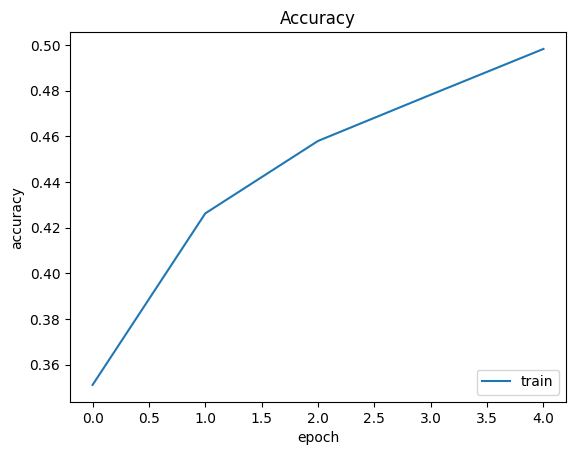

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'],loc='lower right')
plt.show()

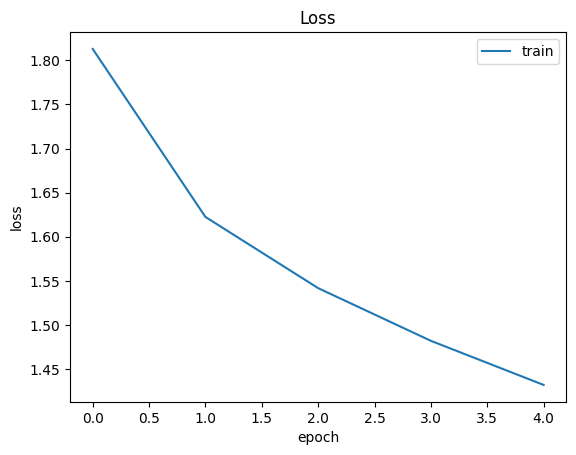

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'],loc='upper right')
plt.show()

In [16]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 11s 33ms/step - loss: 1.4939 - accuracy: 0.4643


[1.4938552379608154, 0.4643000066280365]

In [17]:
y_pred = ann.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]


313/313 [==============================] - 7s 20ms/step


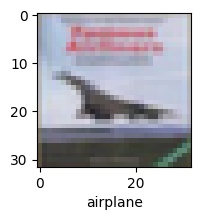

In [18]:
plot_sample(X_test, y_test, 3)

In [19]:
classes[y_classes[3]]

'airplane'